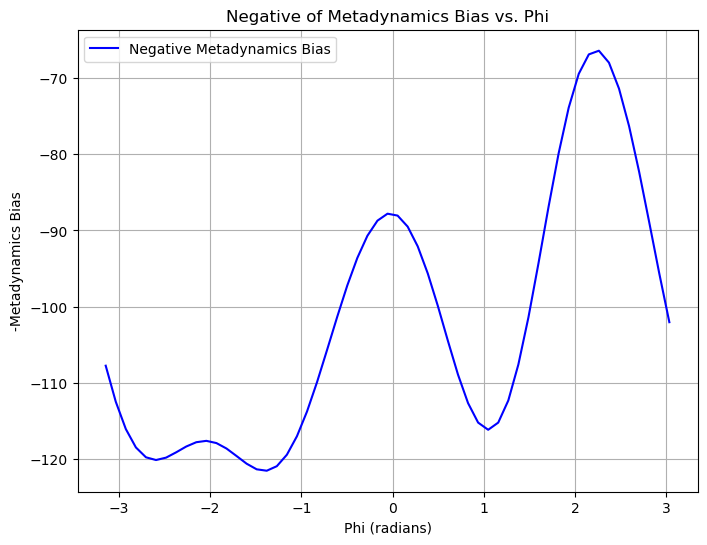

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the grid file, skipping the comment lines at the start

grid_data = np.loadtxt('/home/sa8200/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/StateA/Lugano/StateA.grid.dat', comments='#')

# Extract phi, metad.bias, and der_phi columns
phi_values = grid_data[:, 0]
metad_bias = grid_data[:, 1]  # This is the 'bias' column we want to plot

# Create unique edges for the phi values
phi_edges = np.unique(phi_values)

# Initialize the energy grid
energy_grid = np.zeros((len(phi_edges), 1))

# Fill the energy grid with negative of the bias values
for i, phi in enumerate(phi_edges):
    mask = np.isclose(phi_values, phi, atol=1e-5)
    
    if np.any(mask):
        energy_grid[i] = -np.mean(metad_bias[mask])  # Take the negative of the average bias
    else:
        energy_grid[i] = np.nan  # Handle cases where there are no matches

# Plotting the negative of the energy (bias)
plt.figure(figsize=(8, 6))
plt.plot(phi_edges, energy_grid, label='Negative Metadynamics Bias', color='b')
plt.xlabel('Phi (radians)')
plt.ylabel('-Metadynamics Bias')
plt.title('Negative of Metadynamics Bias vs. Phi')
plt.legend()
plt.grid()
plt.show()


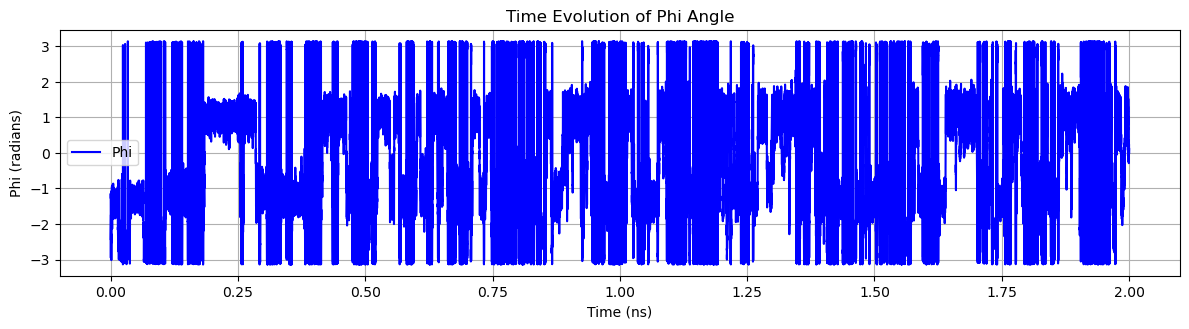

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Load the COLVAR data
colvar_file = '/home/sa8200/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/StateA/Lugano/COLVAR'  # replace with the path to your COLVAR file
data = np.loadtxt(colvar_file, skiprows=1)  # Skip header if necessary
# Assuming the COLVAR file has time in the first column and phi and psi in subsequent columns
time = data[:, 0]  # First column (in ps)
phi = data[:, 1]   # Second column (phi angle in radians)
# Convert time to nanoseconds
time_ns = time / 1000  # Convert ps to ns
# Select data for the first 2 ns
mask = time_ns <= 2
time_ns_filtered = time_ns[mask]
phi_filtered = phi[mask]
# Plotting
plt.figure(figsize=(12, 6))
# Plot phi
plt.subplot(2, 1, 1)
plt.plot(time_ns_filtered, phi_filtered, label='Phi', color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (radians)')
plt.title('Time Evolution of Phi Angle')
plt.grid(True)
plt.legend()
# Show plot
plt.tight_layout()
plt.savefig('CV_evolution.png')  # Save the figure
plt.show()  # Show the figure









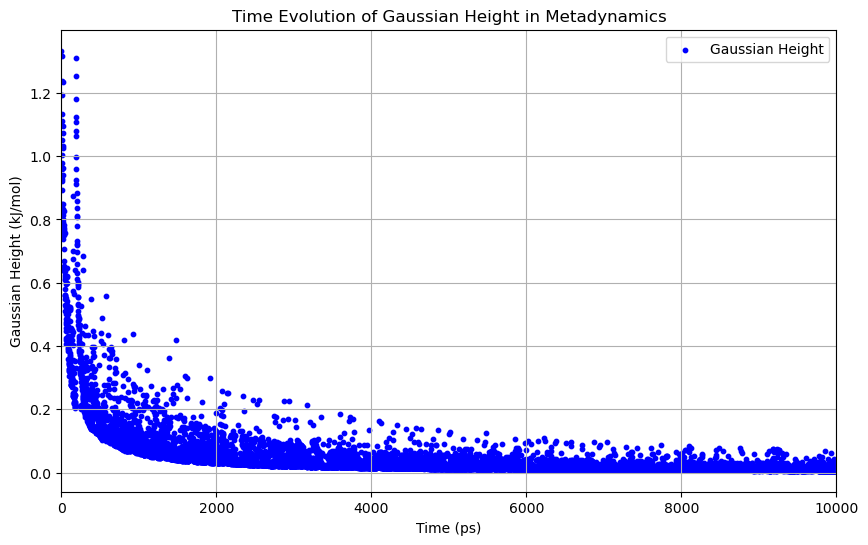

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Load the HILLS file
hills_file = '/home/sa8200/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/StateA/Lugano/HILLS'  # Replace with your HILLS file path
data = np.loadtxt(hills_file, comments='#')
# Extract columns
time = data[:, 0]  # First column: time
height = data[:, 3]  # Fourth column: Gaussian height
# Plotting the Gaussian height over time using dots
plt.figure(figsize=(10, 6))
plt.scatter(time, height, label='Gaussian Height', color='blue', s=10)  # s=10 controls the size of the dots
plt.xlabel('Time (ps)')
plt.ylabel('Gaussian Height (kJ/mol)')
plt.title('Time Evolution of Gaussian Height in Metadynamics')
plt.grid()
plt.legend()
plt.xlim(0, 10000)  # Adjust limits as needed for the first 2 ns
plt.show()











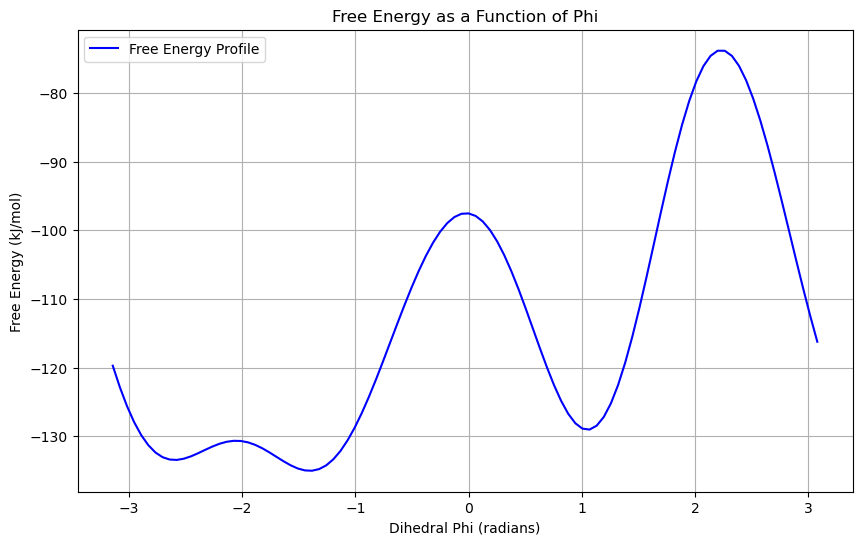

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the free energy data
fes_data = np.loadtxt('fes.dat')

# Plot the free energy surface
plt.figure(figsize=(10, 6))
plt.plot(fes_data[:, 0], fes_data[:, 1], label='Free Energy Profile', color='blue')
plt.xlabel('Dihedral Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy as a Function of Phi')
plt.grid()
plt.legend()
plt.show()


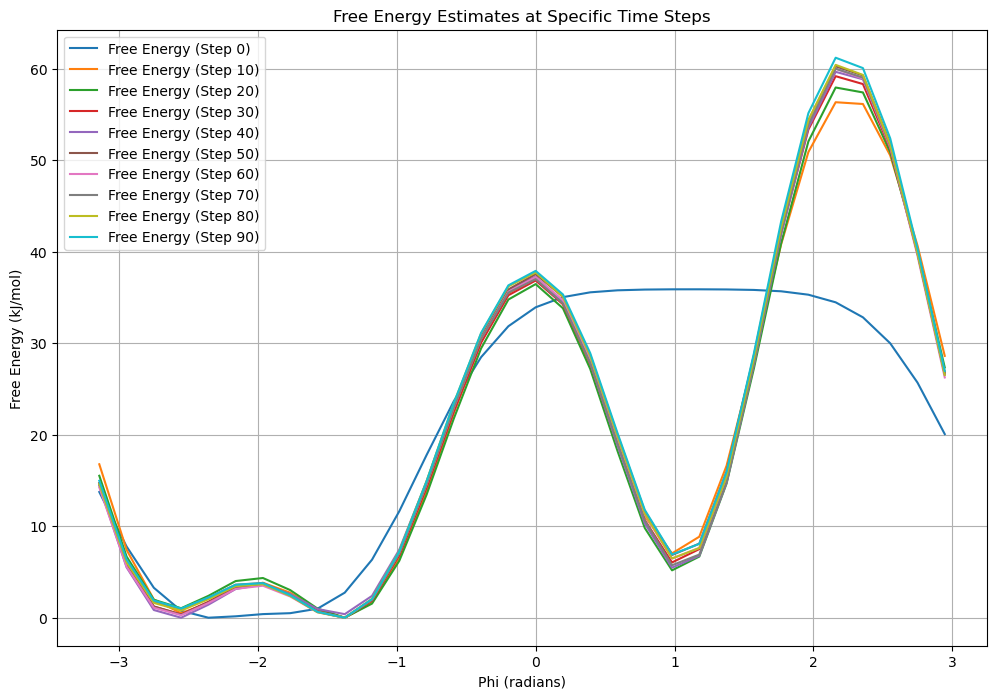

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Specify the time steps you want to plot (in nanoseconds)
time_steps = [0, 10, 20, 30,40,50,60,70,80,90]  # Adjust as needed
# Initialize a figure
plt.figure(figsize=(12, 8))
# Loop through each specified time step
for time in time_steps:
    # Construct the filename for each time step
    fes_file = f'/home/sa8200/comp-lab-class/comp-lab-class-2024/Week6-Metadynamics/Inputs/StateA/Lugano/fes_{time}.dat'
    try:
        # Load the data from the file
        data = np.loadtxt(fes_file, comments='#')
        phi = data[:, 0]  # First column: phi values
        free_energy = data[:, 1]  # Second column: free energy values
        # Plot the free energy
        plt.plot(phi, free_energy, label=f'Free Energy (Step {time})')
    except FileNotFoundError:
        print(f"File {fes_file} not found. Skipping.")
# Set plot labels and title
plt.xlabel('Phi (radians)')
plt.ylabel('Free Energy (kJ/mol)')
plt.title('Free Energy Estimates at Specific Time Steps')
plt.legend()
plt.grid()
plt.show()







